In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Read text data from a file
with open('/content/twitter.txt', 'r') as file:
    text_data = file.readlines()
text_data = [line.strip() for line in text_data if line.strip()]  # Remove empty lines

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels for training
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build and train the SimpleRNN model
model_rnn = Sequential()
model_rnn.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(total_words, activation='softmax'))
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X, y, epochs=100, verbose=0)

# Evaluate the SimpleRNN model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X, y, verbose=0)
print(f"Accuracy of SimpleRNN model: {accuracy_rnn:.4f}")

# Build and train the GRU model
model_gru = Sequential()
model_gru.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model_gru.add(GRU(100))
model_gru.add(Dense(total_words, activation='softmax'))
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_gru.fit(X, y, epochs=100, verbose=0)

# Evaluate the GRU model
loss_gru, accuracy_gru = model_gru.evaluate(X, y, verbose=0)
print(f"Accuracy of GRU model: {accuracy_gru:.4f}")

# Build and train the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(total_words, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X, y, epochs=100, verbose=0)

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X, y, verbose=0)
print(f"Accuracy of LSTM model: {accuracy_lstm:.4f}")

# Generate text using the trained models
def generate_text(seed_text, model, max_sequence_len, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example of generating text with each model
generated_text_rnn = generate_text("This is", model_rnn, max_sequence_length, num_words=5)
generated_text_gru = generate_text("This is", model_gru, max_sequence_length, num_words=5)
generated_text_lstm = generate_text("This is", model_lstm, max_sequence_length, num_words=5)

print("Generated Text (SimpleRNN):", generated_text_rnn)
print("Generated Text (GRU):", generated_text_gru)
print("Generated Text (LSTM):", generated_text_lstm)

Accuracy of SimpleRNN model: 0.9891
Accuracy of GRU model: 0.9891
Accuracy of LSTM model: 0.9881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Generated Text (SimpleRNN): This is how far mr khan could
Generated Text (GRU): This is how far mr khan could
Generated Text (LSTM): This is how far mr khan could


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Accuracy of SimpleRNN model: 0.0541
Accuracy of GRU model: 0.0595
Accuracy of LSTM model: 0.0216


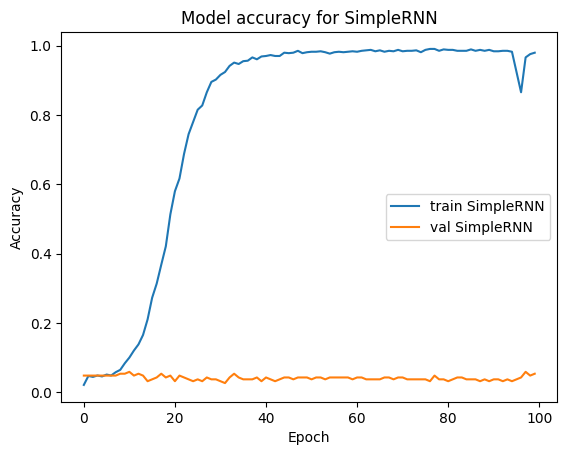

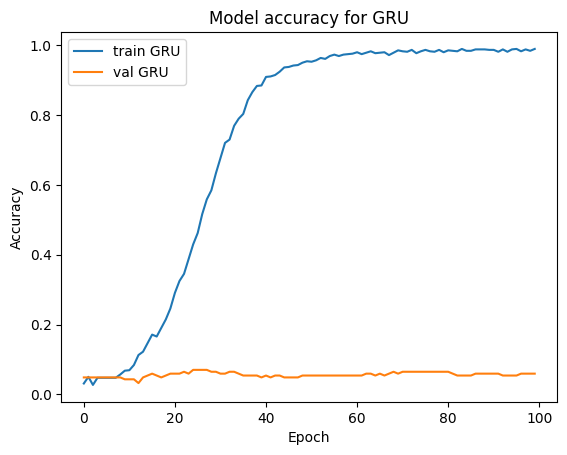

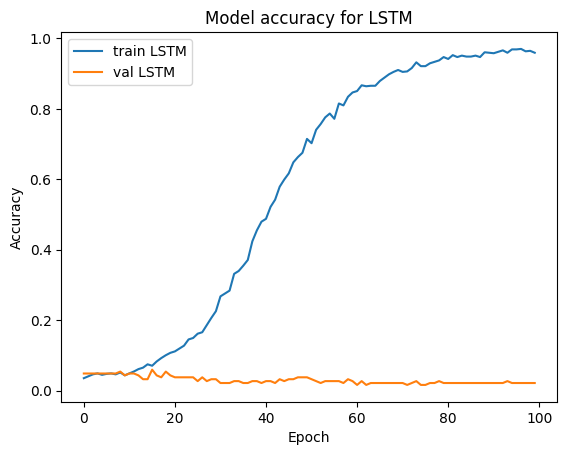

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Generated Text (SimpleRNN): This is how broad and have partnership
Generated Text (GRU): This is how how and more biswas
Generated Text (LSTM): This is all about about governance and


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read text data from a file
with open('/content/IndiaUS (1).txt', 'r') as file:
    text_data = file.readlines()
text_data = [line.strip() for line in text_data if line.strip()]  # Remove empty lines

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

# Create input sequences and labels for training
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and train model
def build_and_train_model(model_type):
    model = Sequential()
    model.add(Embedding(total_words, 50, input_length=max_sequence_length-1))

    if model_type == "simple_rnn":
        model.add(SimpleRNN(100))
    elif model_type == "gru":
        model.add(GRU(100))
    elif model_type == "lstm":
        model.add(LSTM(100))

    model.add(Dropout(0.2))  # Adding dropout for regularization
    model.add(Dense(total_words, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))
    return model, history

# Train models
model_rnn, history_rnn = build_and_train_model("simple_rnn")
model_gru, history_gru = build_and_train_model("gru")
model_lstm, history_lstm = build_and_train_model("lstm")

# Evaluate models
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_val, y_val, verbose=0)
loss_gru, accuracy_gru = model_gru.evaluate(X_val, y_val, verbose=0)
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_val, y_val, verbose=0)

print(f"Accuracy of SimpleRNN model: {accuracy_rnn:.4f}")
print(f"Accuracy of GRU model: {accuracy_gru:.4f}")
print(f"Accuracy of LSTM model: {accuracy_lstm:.4f}")

# Plot training history
def plot_history(history, model_type):
    plt.plot(history.history['accuracy'], label='train ' + model_type)
    plt.plot(history.history['val_accuracy'], label='val ' + model_type)
    plt.title(f'Model accuracy for {model_type}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

# Plot each model's training history
plot_history(history_rnn, "SimpleRNN")
plot_history(history_gru, "GRU")
plot_history(history_lstm, "LSTM")

# Generate text using the trained models
def generate_text(seed_text, model, max_sequence_len, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example of generating text with each model
generated_text_rnn = generate_text("This is", model_rnn, max_sequence_length, num_words=5)
generated_text_gru = generate_text("This is", model_gru, max_sequence_length, num_words=5)
generated_text_lstm = generate_text("This is", model_lstm, max_sequence_length, num_words=5)

print("Generated Text (SimpleRNN):", generated_text_rnn)
print("Generated Text (GRU):", generated_text_gru)
print("Generated Text (LSTM):", generated_text_lstm)